# 评估函数预训练网络 

In [2]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from conv import conv_net
import matplotlib.pyplot as plt
%matplotlib inline

定义训练、测试数据集路径

In [4]:
train_path = "C:/Users/王欣哲/Desktop/codes/人工智能基础/问题3 进化学习/dataset"
test_path = "C:/Users/王欣哲/Desktop/codes/人工智能基础/问题3 进化学习/dataset"

定义执行器    使用GPU运算

In [5]:
gpu_options = tf.GPUOptions(allow_growth=True)
gpu_options =tf.GPUOptions(per_process_gpu_memory_fraction=0.8,allow_growth=True) ##每个gpu占用0.8的显存
config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True,log_device_placement=False)
sess=tf.Session(config=config)##如果电脑有多个GPU，tensorflow默认全部使用。如果想只使用部分GPU，可以设置CUDA_VISIBLE_DEVICES。

加载数据集 定义batch获取函数

In [14]:
# 加载 训练集 标签
with open(train_path + "/train.csv") as f:
    train_data = np.loadtxt(f,delimiter=',') 
    train_len = len(train_data)
# 加载 测试集 标签
with open(test_path + "/test.csv") as f:
    test_data = np.loadtxt(f,delimiter=',') 
    test_len = len(test_data)

In [15]:
#batch获取函数
def get_train_batch(batch_size):
    idx = np.random.randint(1,train_len,size=batch_size)
    _chess=[]
    _label=[]
    for i in idx:
        _chess.append(train_data[i,0:225])
        _label.append(train_data[i,225])
    _chess = np.asfarray(_chess)
    _label = np.asfarray(_label).reshape([batch_size,1])
    return _chess,_label/1000000

def get_test_batch(batch_size):
    idx = np.random.randint(1,test_len,size=batch_size)
    _chess=[]
    _label=[]
    for i in idx:
        _chess.append(test_data[i,0:225])
        _label.append(test_data[i,225])
    _chess = np.asfarray(_chess)
    _label = np.asfarray([_label]).reshape([batch_size,1])
    return _chess,_label/1000000

定义神经网络

In [8]:
xs,ys,y = conv_net()

In [9]:
#定义损失函数、优化器
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-y), reduction_indices=[1]))
train = tf.train.AdamOptimizer(1e-3).minimize(loss)

变量初始化

In [10]:
init = tf.global_variables_initializer()
sess.run(init)

(1, 225)
(1, 1)
[[8.e-06]]
[[-273.7071]]


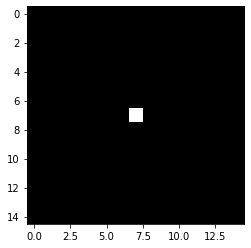

In [11]:
batch = get_train_batch(1)
print(batch[0].shape)
print(batch[1].shape)
print(batch[1])
print(sess.run(y,feed_dict={xs:batch[0]}))
plt.imshow(batch[0][0].reshape(15,15),cmap='Greys',interpolation='None')

开始训练

In [16]:
res_train_loss = []
res_test_loss = []

In [17]:
BATCH_SIZE=1024
batch_test = get_test_batch(1000)
for i in range(10000):
    batch = get_train_batch(BATCH_SIZE)
    sess.run(train,feed_dict = {xs:batch[0],ys:batch[1]})
    if i%50==0:
        l = sess.run(loss,feed_dict = {xs:batch[0],ys:batch[1]})
        res_train_loss.append(l)
        print("    T:%d    loss:%f" %(i,l))
    if i%200==0:
        l = sess.run(loss,feed_dict = {xs:batch_test[0],ys:batch_test[1]})
        res_test_loss.append(l)
        print("Test-set   T:%d    loss:%f" %(i,l))

    T:0    loss:2150.843506
Test-set   T:0    loss:2056.007324
    T:50    loss:1232.006226
    T:100    loss:859.287598
    T:150    loss:790.283386
    T:200    loss:629.650085
Test-set   T:200    loss:588.730652
    T:250    loss:535.255737
    T:300    loss:507.641296
    T:350    loss:425.983215
    T:400    loss:379.809845
Test-set   T:400    loss:349.254669
    T:450    loss:330.185028
    T:500    loss:285.783325
    T:550    loss:259.148926
    T:600    loss:272.256714
Test-set   T:600    loss:243.788544
    T:650    loss:235.996063
    T:700    loss:226.603592
    T:750    loss:211.852463
    T:800    loss:203.415192
Test-set   T:800    loss:184.885986
    T:850    loss:179.601700
    T:900    loss:174.248550
    T:950    loss:159.405823
    T:1000    loss:160.654633
Test-set   T:1000    loss:144.805283
    T:1050    loss:148.088531
    T:1100    loss:138.499451
    T:1150    loss:137.633545
    T:1200    loss:126.374527
Test-set   T:1200    loss:119.966782
    T:1250    loss

KeyboardInterrupt: 

打印训练曲线

92


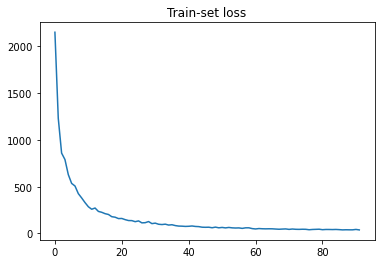

In [22]:
print(len(res_train_loss))
plt.plot(res_train_loss)
plt.title("Train-set loss")
plt.savefig("./train_loss_60.jpg")
plt.show()

23


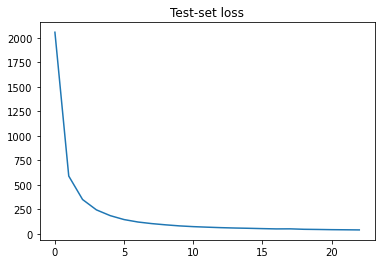

In [20]:
print(len(res_test_loss))
plt.plot(res_test_loss)
plt.title("T-set loss")
plt.savefig("C:/Users/王欣哲/Desktop/codes/人工智能基础/问题1 棋盘识别/2.模型训练/test_loss_60.jpg")
plt.show()

保存训练模型

In [20]:
saver = tf.train.Saver()#为下面保存做准备
saver.save(sess, './ass_net_3.0/conv_ver_1.ckpt')

'./ass_net_3.0/conv_ver_1.ckpt'

In [21]:
#保存为pb文件，更小，更好
constant_graph = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, ['y'])

with tf.gfile.FastGFile('./ass_net_V3.0.pb', mode='wb') as f:
    f.write(constant_graph.SerializeToString())

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
Instructions for updating:
Use tf.gfile.GFile.


In [22]:
batch = get_train_batch(500)
print()